In [1]:
import os
import re
import json
import numpy as np
import xarray as xr
import collections
import itertools
import networkx as nx
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Choose chemical mechanism
model_name = 'MCM_C1C5'
exp_name = 'init'
if model_name.split('_')[0] == 'MCM':
    pass
#     x1, x2 = -300, 200 # -400, 100
#     y1, y2 = -150, 200 # -300, 200
if model_name.split('_')[0] == 'CRI':
    x1, x2 = -400, 400 # -300, 300
    y1, y2 = -400, 400 # -300, 300

In [3]:
# Load reaction descriptions
eqs_json_path = os.getcwd()
with open(os.path.join(eqs_json_path, model_name+'_'+exp_name+'.json'), 'r') as f:
    all_mcm_eqs = json.load(f)

In [4]:
# Convert equation's info to nodes, edges and edge labels needed for networkx
nodes = []#['N2'] # nodes
links = [] # edges
link_labels = collections.OrderedDict() # edge labels
major_reactants = ['CL', 'H2', 'HO2', 'NO', 'NO2', 'NO3', 'OH', 'SO2', 'SO3'] # 'arrows', no nodes created
for eq in all_mcm_eqs:
    if len(eq['reac']) == 1:
        if 'J' in eq['coef'] and len(eq['prod']) == 1:
            link = (eq['reac'][0], eq['prod'][0])
            links.append(link)
            link_labels[link] = 'hv'
        elif 'J' in eq['coef'] and len(eq['prod']) != 1:
            for prod in eq['prod']:
                link = (eq['reac'][0], prod)
                links.append(link)
                link_labels[link] = 'hv'
        elif 'J' not in eq['coef'] and len(eq['prod']) == 1:
            link = (eq['reac'][0], eq['prod'][0])
            links.append(link)
            link_labels[link] = ''
        elif 'J' not in eq['coef'] and len(eq['prod']) != 1:
            for prod in eq['prod']:
                link = (eq['reac'][0], prod)
                links.append(link)
                link_labels[link] = ''
    else: # len(eq['reac']) == 2:
        reac1, reac2 = eq['reac']
        if reac1 in major_reactants and reac2 not in major_reactants:
            reac1, reac2 = reac2, reac1
        if len(eq['prod']) == 1:
            for reac in eq['reac']:
                link = (reac, eq['prod'][0])
                links.append(link)
                link_labels[link] = reac2
        elif len(eq['prod']) != 1:
            for reac in eq['reac']:
                for prod in eq['prod']:
                    link = (reac, prod)
                    links.append(link)
                    link_labels[link] = reac2
    for reac in eq['reac']:
        if reac not in nodes:
            nodes.append(reac)
    for prod in eq['prod']:
        if prod not in nodes:
            nodes.append(prod)

In [5]:
# Create network layout (don't run this cell again if want to preserve positions of nodes and edges)
scheme = nx.MultiDiGraph()
scheme.add_edges_from(links)
scheme.add_nodes_from(nodes)
pos = nx.nx_pydot.graphviz_layout(scheme)

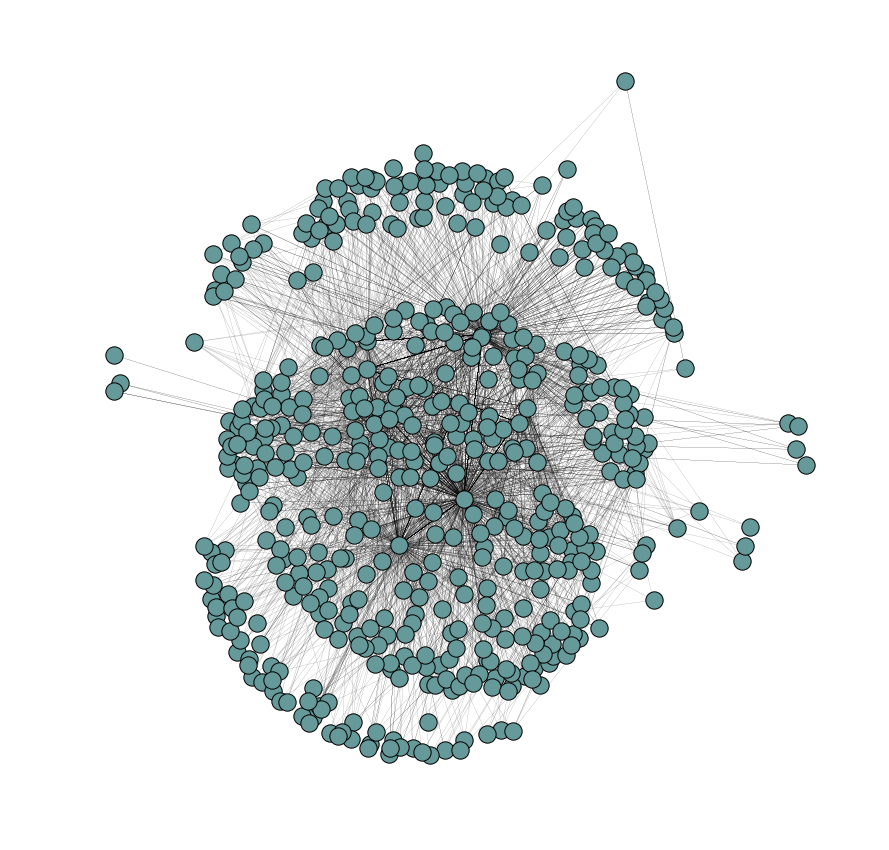

In [6]:
## Draw main network
fig, ax = plt.subplots(figsize=(15,15))
nx.draw_networkx_nodes(scheme, pos, ax=ax, node_color='#669999')
# nx.draw_networkx_labels(scheme, pos, {k: k for k in nodes}, ax=ax, font_size=9) # nodes_latex_dict
nx.draw_networkx_edges(scheme, pos, ax=ax, edge_color='k', width=0.1, arrows=False)
_ = ax.axis('off')
# ax.set_xlim(x1, x2)
# ax.set_ylim(y1, y2)
# change color of the nodes' outline
ax.collections[0].set_edgecolor('k') 
fig.savefig(os.path.join(eqs_json_path, model_name+'_v3.png'), dpi=100, bbox_inches='tight', facecolor='#FFD1AA')
fig.savefig(os.path.join(eqs_json_path, model_name+'_v3.svg'), bbox_inches='tight', facecolor='#FFD1AA')
fig.savefig(os.path.join(eqs_json_path, model_name+'_v3_transparent.svg'), bbox_inches='tight', transparent=True)

In [ ]:
# # r = re.compile(r'([0-9])*')
# nodes_latex = []
# nodes_latex_dict = dict()
# for node in nodes:
#     new_node = '$'
#     for ch in node:
#         if ch.isdigit():
#             new_node += '_'
#         new_node += ch
#     new_node += '$'
#     nodes_latex.append(new_node)
#     nodes_latex_dict[node] = new_node
# plt.rcParams['mathtext.default'] = 'regular'